In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('wine.csv', header=None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
0     178 non-null int64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null int64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
13    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eb95873c8>,
      dtype=object)

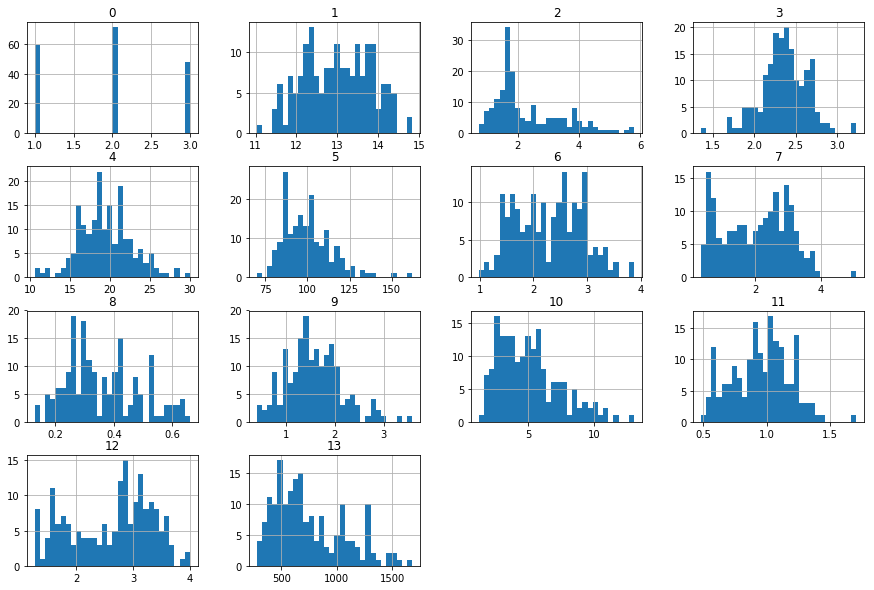

In [6]:
dataset.hist(bins=30, figsize=(15, 10))

In [7]:
corr_matrix = dataset.corr()
corr_matrix[0].sort_values(ascending=False)

0     1.000000
4     0.517859
8     0.489109
2     0.437776
10    0.265668
3    -0.049643
5    -0.209179
1    -0.328222
9    -0.499130
11   -0.617369
13   -0.633717
6    -0.719163
12   -0.788230
7    -0.847498
Name: 0, dtype: float64

In [44]:
X = dataset.iloc[:, [4, 8, 2, 7, 12, 6, 13, 11, 9]].values
y = dataset.iloc[:, 0].values

In [136]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
from sklearn.naive_bayes import GaussianNB

gauss_clf = GaussianNB()
gauss_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [140]:
from sklearn.metrics import confusion_matrix

y_train_pred_test = gauss_clf.predict(X_test)
confusion_matrix(y_test, y_train_pred_test)

array([[14,  0,  0],
       [ 1, 12,  1],
       [ 0,  0,  8]])

In [141]:
from sklearn.metrics import f1_score

print("F1 score: {0:.3f}".format(f1_score(y_test, y_train_pred_test, average='macro')))

F1 score: 0.943


In [142]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(gauss_clf, X_train, y_train, cv=10)

In [143]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train, y_train_pred))

0.2783249696530916

In [144]:
confusion_matrix(y_train, y_train_pred)

array([[43,  2,  0],
       [ 4, 50,  3],
       [ 0,  2, 38]])

In [145]:
print("F1 score: {0:.3f}".format(f1_score(y_train, y_train_pred, average='macro')))

F1 score: 0.925
